# Custom OCR - training the neural network



# Importing the libraries

In [ ]:
import tensorflow
tensorflow.__version__

'2.15.0'

In [ ]:
import numpy as np
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Loading the datasets

## MNIST 0-9

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [ ]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
28 * 28

784

In [ ]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [ ]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
train_labels[0]

5

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [ ]:
digits_data.shape

(70000, 28, 28)

In [ ]:
digits_labels.shape

(70000,)

In [ ]:
np.random.randint(0, digits_data.shape[0])

4765

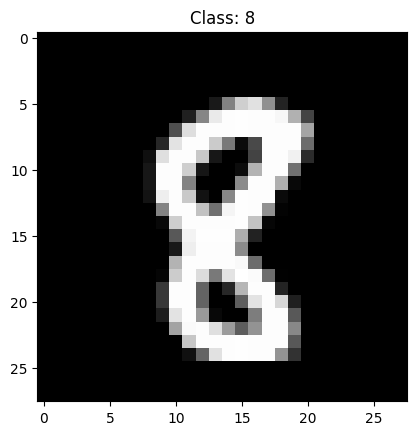

In [ ]:
index = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[index], cmap='gray')
plt.title('Class: ' + str(digits_labels[index]));

## Kaggle A-Z

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_az = pd.read_csv('/content/drive/MyDrive/OCR/emnist-letters-train.csv').astype('float32')
dataset_az

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88794,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88795,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88796,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88797,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
alphabet_data = dataset_az.drop('23', axis = 1)
alphabet_labels = dataset_az['23']

In [ ]:
alphabet_data.shape, alphabet_labels.shape

((88799, 784), (88799,))

In [ ]:
alphabet_labels

0         7.0
1        16.0
2        15.0
3        23.0
4        17.0
         ... 
88794     1.0
88795    21.0
88796     1.0
88797    23.0
88798    12.0
Name: 23, Length: 88799, dtype: float32

In [ ]:
alphabet_data = dataset_az.values[:,1:].reshape(88799,28,28)

In [ ]:
alphabet_data.shape

(88799, 28, 28)

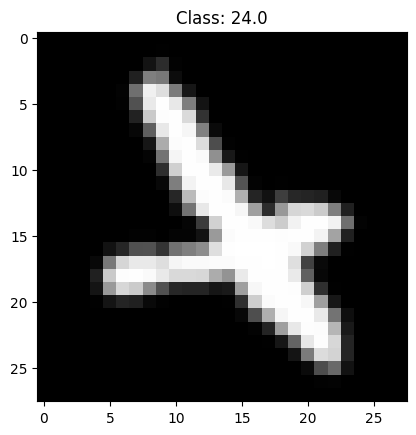

In [ ]:
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]));

## Joining the datasets

In [ ]:
digits_labels, np.unique(digits_labels)

(array([5, 0, 4, ..., 4, 5, 6], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [ ]:
alphabet_labels, np.unique(alphabet_labels)

(0          0.0
 1          0.0
 2          0.0
 3          0.0
 4          0.0
           ... 
 372445    25.0
 372446    25.0
 372447    25.0
 372448    25.0
 372449    25.0
 Name: 0, Length: 372450, dtype: float32,
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
       dtype=float32))

In [ ]:
alphabet_labels += 10

In [ ]:
alphabet_labels, np.unique(alphabet_labels)

(0         7.0
 1        16.0
 2        15.0
 3        23.0
 4        17.0
          ... 
 88794     1.0
 88795    21.0
 88796     1.0
 88797    23.0
 88798    12.0
 Name: 23, Length: 88799, dtype: float32,
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.],
       dtype=float32))

In [ ]:
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [ ]:
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [ ]:
np.unique(alphabet_labels)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.],
      dtype=float32)

In [ ]:
data = np.array(alphabet_data, dtype = 'float32')

In [ ]:
data = np.expand_dims(data, axis = -1)

In [ ]:
data.shape

(88799, 28, 28, 1)

# Pre-processing the data

In [ ]:
data[0].min(), data[0].max()

(0.0, 255.0)

In [ ]:
data /= 255.0

In [ ]:
data[0].min(), data[0].max()

(0.0, 1.0)

In [ ]:
np.unique(alphabet_labels), len(np.unique(alphabet_labels)) # softmax

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.],
       dtype=float32),
 26)

In [ ]:
le = LabelBinarizer()
labels = le.fit_transform(alphabet_labels)

In [ ]:
np.unique(labels)

array([0, 1])

In [ ]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
labels[0], len(labels[0])

(array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]),
 26)

In [ ]:
labels[30000]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
# OneHotEncoder
# A, B, C
# 0, 1, 2

# A, B, C
# 1, 0, 0
# 0, 1, 0
# 0, 0, 1

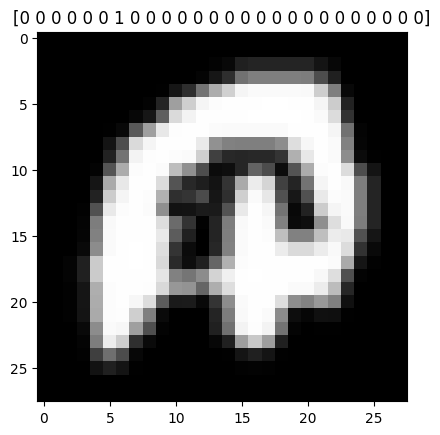

In [ ]:
plt.imshow(data[0].reshape(28,28), cmap='gray')
plt.title(str(labels[0]));

In [ ]:
classes_total = labels.sum(axis = 0)
classes_total

array([3396, 3396, 3419, 3398, 3437, 3394, 3385, 3424, 3428, 3402, 3438,
       3415, 3402, 3365, 3408, 3430, 3435, 3419, 3392, 3436, 3419, 3422,
       3422, 3437, 3453, 3427])

In [ ]:
classes_total.max()

3453

In [ ]:
3453 / 3396

1.0167844522968197

In [ ]:
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

In [ ]:
classes_weights

{0: 1.0167844522968197,
 1: 1.0167844522968197,
 2: 1.0099444281953787,
 3: 1.0161859917598588,
 4: 1.0046552225778296,
 5: 1.0173836181496758,
 6: 1.0200886262924667,
 7: 1.0084696261682242,
 8: 1.0072928821470244,
 9: 1.0149911816578483,
 10: 1.0043630017452008,
 11: 1.0111273792093705,
 12: 1.0149911816578483,
 13: 1.026151560178306,
 14: 1.0132042253521127,
 15: 1.0067055393586006,
 16: 1.005240174672489,
 17: 1.0099444281953787,
 18: 1.0179834905660377,
 19: 1.0049476135040745,
 20: 1.0099444281953787,
 21: 1.0090590298071302,
 22: 1.0090590298071302,
 23: 1.0046552225778296,
 24: 1.0,
 25: 1.0075868106215349}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

In [ ]:
X_train.shape, X_test.shape

((71039, 28, 28, 1), (17760, 28, 28, 1))

In [ ]:
y_train.shape, y_test.shape

((71039, 26), (17760, 26))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Buiding the neural network

- Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(26, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
2 * 2 * 128

512

In [ ]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

In [ ]:
name_labels = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

In [ ]:
print(name_labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# Training the neural network

In [ ]:
file_model = 'custom_ocr2.model'
epochs = 10
batch_size = 32

In [ ]:
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [ ]:
len(X_train) // batch_size

2219

In [ ]:
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/10
2215/2219 [============================>.] - ETA: 0s - loss: 0.6976 - accuracy: 0.7811
Epoch 1: val_loss improved from inf to 0.29444, saving model to custom_ocr2.model
2219/2219 [==============================] - 38s 16ms/step - loss: 0.6969 - accuracy: 0.7812 - val_loss: 0.2944 - val_accuracy: 0.8997
Epoch 2/10
2217/2219 [============================>.] - ETA: 0s - loss: 0.3271 - accuracy: 0.8927
Epoch 2: val_loss improved from 0.29444 to 0.23692, saving model to custom_ocr2.model
2219/2219 [==============================] - 32s 15ms/step - loss: 0.3270 - accuracy: 0.8928 - val_loss: 0.2369 - val_accuracy: 0.9218
Epoch 3/10
2219/2219 [==============================] - ETA: 0s - loss: 0.2709 - accuracy: 0.9094
Epoch 3: val_loss did not improve from 0.23692
2219/2219 [==============================] - 33s 15ms/step - loss: 0.2709 - accuracy: 0.9094 - val_loss: 0.2778 - val_accuracy: 0.9106
Epoch 4/10
2216/2219 [============================>.] - ETA: 0s - loss: 0.2421 - accur

# Evaluating the neural network

In [ ]:
X_test.shape

(17760, 28, 28, 1)

In [ ]:
predictions = network.predict(X_test, batch_size=batch_size)

555/555 [==============================] - 1s 2ms/step


In [ ]:
predictions

array([[5.3017413e-11, 1.5343577e-11, 7.6496265e-10, ..., 5.8313714e-07,
        4.2525603e-04, 1.0814128e-10],
       [8.2419810e-06, 3.7521506e-05, 3.7739599e-05, ..., 2.4963999e-15,
        3.7846417e-11, 2.8565066e-09],
       [1.8933207e-07, 7.0246749e-08, 2.6533673e-06, ..., 1.5509687e-11,
        3.4730290e-06, 1.1807136e-08],
       ...,
       [6.8240174e-09, 4.6211567e-06, 5.2924628e-07, ..., 6.2562622e-11,
        1.9506812e-09, 3.6762857e-09],
       [2.2305679e-07, 1.7853403e-06, 4.7288654e-06, ..., 2.4047715e-08,
        2.0531913e-07, 2.4067754e-07],
       [1.3852325e-04, 5.5689425e-10, 4.4359016e-10, ..., 3.2472007e-18,
        5.4474210e-11, 1.5608282e-15]], dtype=float32)

In [ ]:
predictions[0]

array([5.3017413e-11, 1.5343577e-11, 7.6496265e-10, 2.6736462e-09,
       1.2950281e-09, 1.2988809e-11, 5.4353579e-09, 2.8498459e-09,
       3.0212507e-07, 1.9832005e-06, 2.1901734e-08, 5.9897656e-07,
       2.8037562e-07, 1.3715530e-05, 2.0632855e-12, 2.3191598e-08,
       1.7419703e-08, 1.3076385e-05, 8.2523356e-11, 2.1780069e-10,
       2.8898980e-05, 9.9946576e-01, 4.9438604e-05, 5.8313714e-07,
       4.2525603e-04, 1.0814128e-10], dtype=float32)

In [ ]:
len(predictions[0])

26

In [ ]:
np.argmax(predictions[0])

21

In [ ]:
name_labels[21]

'V'

In [ ]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0])

In [ ]:
np.argmax(y_test[0])

21

In [ ]:
name_labels[np.argmax(y_test[0])]

'V'

In [ ]:
network.evaluate(X_test, y_test)

555/555 [==============================] - 1s 2ms/step - loss: 0.1842 - accuracy: 0.9422


[0.18416285514831543, 0.9422297477722168]

In [ ]:
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           A       0.93      0.96      0.94       679
           B       0.97      0.99      0.98       679
           C       0.98      0.95      0.97       684
           D       0.95      0.96      0.96       680
           E       0.96      0.98      0.97       687
           F       0.99      0.96      0.98       679
           G       0.94      0.81      0.87       677
           H       0.96      0.96      0.96       685
           I       0.83      0.58      0.68       686
           J       0.96      0.94      0.95       680
           K       0.98      0.97      0.97       688
           L       0.69      0.87      0.77       683
           M       0.98      0.99      0.98       680
           N       0.95      0.97      0.96       673
           O       0.97      0.98      0.97       682
           P       0.99      0.98      0.98       686
           Q       0.86      0.94      0.90       687
           R       0.96    

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

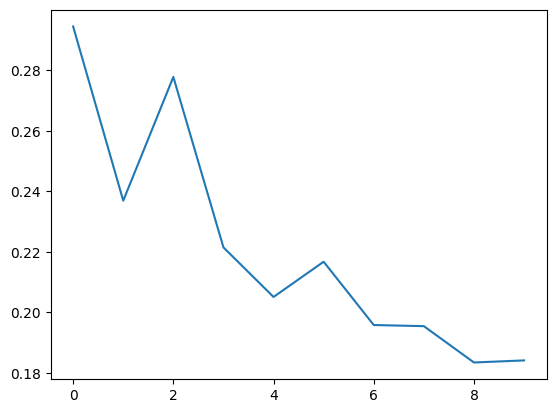

In [ ]:
plt.plot(history.history['val_loss']);

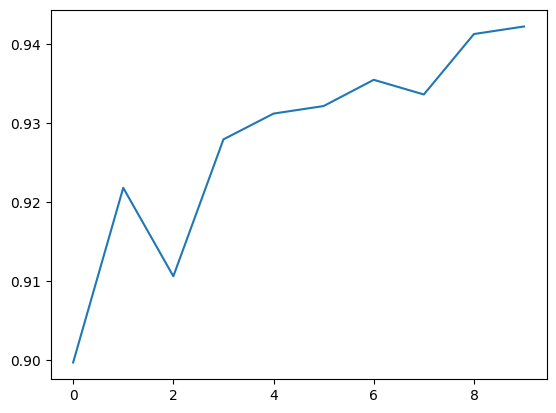

In [ ]:
plt.plot(history.history['val_accuracy']);

# Saving the neural network on Google Drive

In [ ]:
network.save('network2', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p /content/drive/MyDrive/OCR

In [ ]:
!cp network2 /content/drive/MyDrive/OCR/network2

# Testing the neural network with images

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
loaded_network = load_model('/content/drive/MyDrive/OCR/network')

In [ ]:
loaded_network

In [ ]:
loaded_network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/OCR/Images/Snew.jpg')
cv2_imshow(img)

In [ ]:
img.shape

(30, 30, 3)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(30, 30)

In [ ]:
cv2_imshow(gray)

In [ ]:
value, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2_imshow(thresh)

In [ ]:
value

139.0

In [ ]:
thresh.shape

(30, 30)

In [ ]:
img = cv2.resize(thresh, (28,28))
cv2_imshow(img)

In [ ]:
img.shape

(28, 28)

In [ ]:
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis = -1)
img.shape

(28, 28, 1)

In [ ]:
img = np.reshape(img, (1,28,28,1))
img.shape

(1, 28, 28, 1)

In [ ]:
prediction = loaded_network.predict(img)
prediction

1/1 [==============================] - 0s 25ms/step


array([[5.6761742e-04, 4.0276980e-04, 2.0137020e-04, 2.6790213e-04,
        5.6547945e-04, 4.4250228e-05, 1.6777938e-04, 1.3422181e-02,
        4.8080328e-05, 1.7727467e-03, 5.5966480e-04, 8.4662017e-05,
        1.9218473e-01, 2.0691624e-01, 1.2906639e-05, 8.4806466e-04,
        1.6413475e-04, 1.8637542e-02, 5.8339265e-05, 2.8404850e-04,
        3.6735772e-03, 2.0507713e-01, 3.1788072e-01, 6.6573373e-03,
        2.9055512e-02, 4.4522135e-04]], dtype=float32)

In [ ]:
result = np.argmax(prediction)

In [ ]:
result

22

In [ ]:
name_labels[result]

'W'